# Bike Sharing System Case Study

<hr style="border:1px solid blue">

A case study to solve a business problem by building a multiple linear regression model for the prediction of demand for shared bikes.
* Comprehend the given data set and perform Exploratory Data Analysis (EDA) to analyse the data set.
* Build multiple linear regression model to identify the best fit variables that can predict the demand for shared bikes.

### Project Description

A US bike-sharing provider **BoomBikes** provides service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Company allows people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The company has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic and is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all-around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Data Set Brief Information
The data set contains information about the number of bike rentals during various environment factors, holidays, working day, weekends and across month and year (from 2018 to 2019). The data set contains
* Numerical Variables
* Categorical variables represented as numbers

A data dictionary is provided along with the data set to understand various terms and variables used.

In the dataset provided, there are three columns named 'casual', 'registered', and 'cnt'.
* The variable 'casual' indicates the number casual users who have made a rental.
* The variable 'registered' indicates the total number of registered users who have made a booking on a given day.
* Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered.

#### Business Objective
Analyse and Perform Exploratory Data Analysis (EDA) on the given data set. Build a multiple linear regression model to identify the best fit variables that can predict the demand for shared bikes ('cnt' as target variable).

#### Business Solution
Present the model, which can predict the number of bike rentals. BoomBikes management will use this model to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Data Understanding

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
# Display all columns
pd.set_option("display.max_columns", None)
# Display all floating point values with precision adjusted to two digits
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline
import seaborn as sns
# Ignore warnings due to library versions
import warnings
warnings.filterwarnings("ignore")
# Import train_test_split to split data to random train and test subsets
from sklearn.model_selection import train_test_split
# Import min-max scalar for scaling data
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Import library to calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import statistical model library
import statsmodels.api as sm
# Calculate R-squared value
from sklearn.metrics import r2_score

In [2]:
# Read the dataset
bss_df = pd.read_csv('day.csv')

In [3]:
# Check the shape of the dataframe
bss_df.shape

(730, 16)

The given data set have 730 rows and 16 columns. Let's see first 5 values of data set.

In [4]:
# Check the first five rows
bss_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


Get the concise summary of data set and data type of each column

In [5]:
# Check the dataframe info
bss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observations**

1) We don't have any columns without name.

2) Date column 'dteday', is in the format 'Day-Month-Year'.

3) We already have month and year columns.

4) There are no NULL values in data set and hence imputation is not required.

### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set and also verify that column 'cnt' is indeed sum of columns 'yr' and 'mnth'.

In [6]:
# Check if there is any duplicated entries in rows
bss_df[bss_df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Observation** : There are no such rows that have duplicated entries.

In [7]:
# Check if there is any row with total users not equal to sum of 'casual' and 'registered' users.
bss_df[bss_df['casual'] + bss_df['registered'] != bss_df['cnt']]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Observation** : There are no such rows that have wrong sum in 'cnt' column.

#### Data Analysis and Filtering

With the help of data dictionary, let's analyse each values filled in columns and understand their respective meaning.

**Observations**

1) Column 'instant' is not required as it is an index variable.

2) Date Column 'dteday' is extracted to create columns 'yr', 'mnth' and weekday, hence it is not required.

3) Our target variable is 'cnt' and we don't need separate prediction of casual vs registered users. Hence we can remove columns    'casual' and 'registered'

4) Eventhough columns 'season', 'mnth', 'weekday' and 'weathersit' are integer data type, they are actually categorical            variables. Hence we require data type conversion for these columns.

5) Columns 'yr', 'holiday' and 'workingday' are also category, but the values are only 0's and 1's. Hence we don't need to     
   change their data type, we can consider it as binary variables.

#### Filtering

Drop columns 'instant', 'dteday', 'casual' and 'registered'

In [8]:
# After analysing data dictionary, we can remove columns that are not required
list_of_columns = ['instant', 'dteday', 'casual', 'registered']

# Remove columns
bss_df.drop(labels = list_of_columns, axis = 1, inplace = True)

#### Standardise Data Types

We must do data type conversion of columns - 'season', 'mnth', 'weekday' and 'weathersit' to category data type

In [9]:
# Convert variables to category data type
list_of_columns = ['season', 'mnth', 'weekday', 'weathersit']

bss_df[list_of_columns] = bss_df[list_of_columns].astype('category')

Now we have filtered data set and changed data type of variables, let's see current data set concise summary.

In [10]:
# Check the shape of the dataframe
bss_df.shape

(730, 12)

That data set have 730 rows and 12 columns

In [11]:
# Check the dataframe info
bss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [12]:
# Check the first five rows
bss_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [13]:
# Check the percentile and min-max of numerical variables.
bss_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.5,0.03,0.68,20.32,23.73,62.77,12.76,4508.01
std,0.5,0.17,0.47,7.51,8.15,14.24,5.20,1936.01
min,0.0,0.00,0.00,2.42,3.95,0.00,1.50,22.00
25%,0.0,0.00,0.00,13.81,16.89,52.00,9.04,3169.75
50%,0.5,0.00,1.00,20.47,24.37,62.62,12.13,4548.50
75%,1.0,0.00,1.00,26.88,30.45,72.99,15.63,5966.00
max,1.0,1.00,1.00,35.33,42.04,97.25,34.00,8714.00


### Data Visualization

Let's visualize data to identify:

1) If there is some obvious multicollinearity between variables.

2) Identify if some predictors directly have a strong association with the outcome variable 'cnt'

#### Visualising Numeric Variables

Let's see our outcome variable 'cnt' - distribution

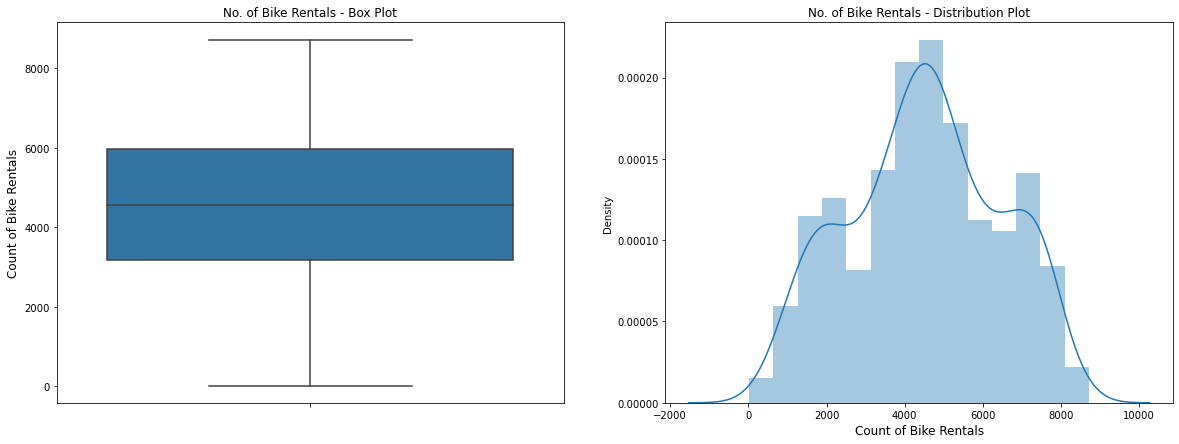

In [14]:
# Plot boxplot and distribution plot of 'cnt' column in subplot
# Subplot - 1 rows and 2 columns
fig, axes = plt.subplots(1, 2)

# Box Plot of column annual_inc
sns.boxplot(y = bss_df['cnt'], ax = axes[0])
axes[0].set_ylabel('Count of Bike Rentals', fontsize = 12)
axes[0].set_title('No. of Bike Rentals - Box Plot')

# Distribution Plot of column annual_inc
sns.distplot(bss_df['cnt'], ax = axes[1])
axes[1].set_xlabel('Count of Bike Rentals', fontsize = 12)
axes[1].set_title('No. of Bike Rentals - Distribution Plot')

fig.set_size_inches(20, 7, forward = True)
plt.show()

In [15]:
# Analysis of min, max and median of 'cnt' column
bss_df['cnt'].describe()

count     730.00
mean     4508.01
std      1936.01
min        22.00
25%      3169.75
50%      4548.50
75%      5966.00
max      8714.00
Name: cnt, dtype: float64

**Observation** : 'cnt' variable is kind of normally distributed from 0 to 10000 and median (50th percentile) is 4548.50.

Let's make a pairplot of all the non-categorical variables

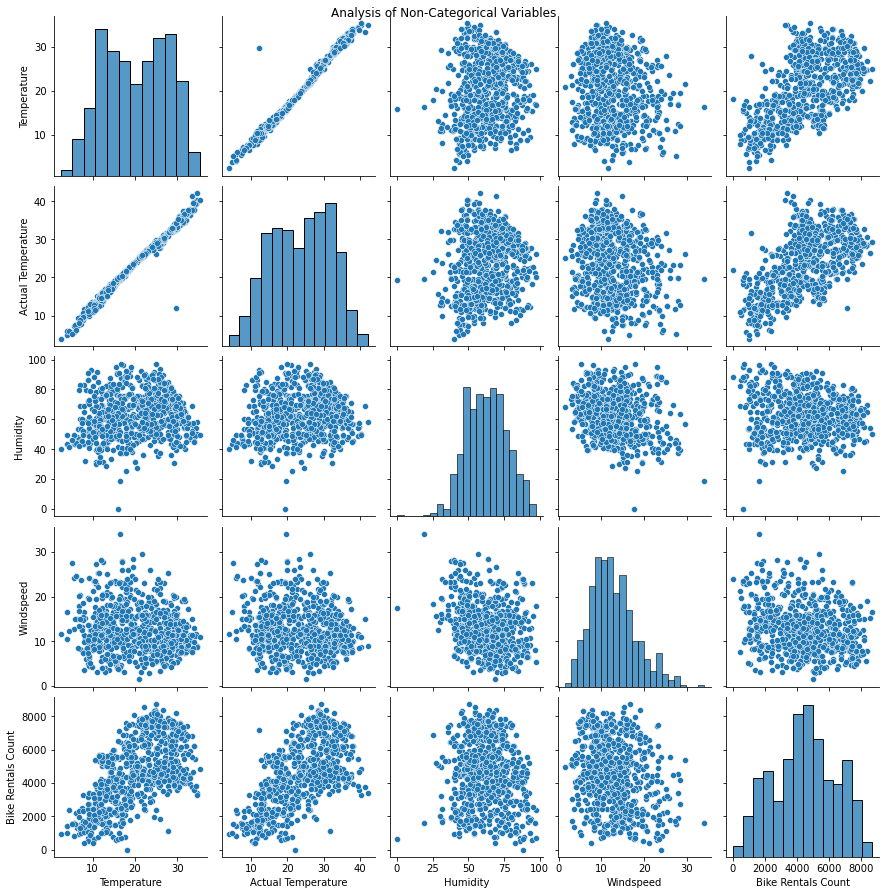

In [16]:
# List of non-categorical type variables
list_of_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Pair Plot
g = sns.pairplot(bss_df[list_of_columns])
# Labels
labels = ['Temperature', 'Actual Temperature', 'Humidity', 'Windspeed', 'Bike Rentals Count']
for i in range(5):
    for j in range(5):
        g.axes[j,i].xaxis.set_label_text(labels[i])
        g.axes[j,i].yaxis.set_label_text(labels[j])
plt.suptitle('Analysis of Non-Categorical Variables', va = 'bottom')
plt.show()

**Observations**

1) There is a strong linear relationship between 'temp' and 'atemp' variables.

2) There is a linear relationship between 'temp' and 'atemp' with 'cnt' variable.

Let's observe the statistics description and get correlation matrix to confirm this further.

In [17]:
list_of_columns = ['temp', 'atemp', 'hum', 'windspeed']

# Analysis of min, max and median of list_of_columns
bss_df[list_of_columns].describe()

,temp,atemp,hum,windspeed
count,730.00,730.00,730.00,730.00
mean,20.32,23.73,62.77,12.76
std,7.51,8.15,14.24,5.20
min,2.42,3.95,0.00,1.50
25%,13.81,16.89,52.00,9.04
50%,20.47,24.37,62.62,12.13
75%,26.88,30.45,72.99,15.63
max,35.33,42.04,97.25,34.00


Statistics of 'temp' and 'atemp' looks closely mapped.

Let's plot a dendrogram to see hierarchical clustering of correlation between numerical variables.

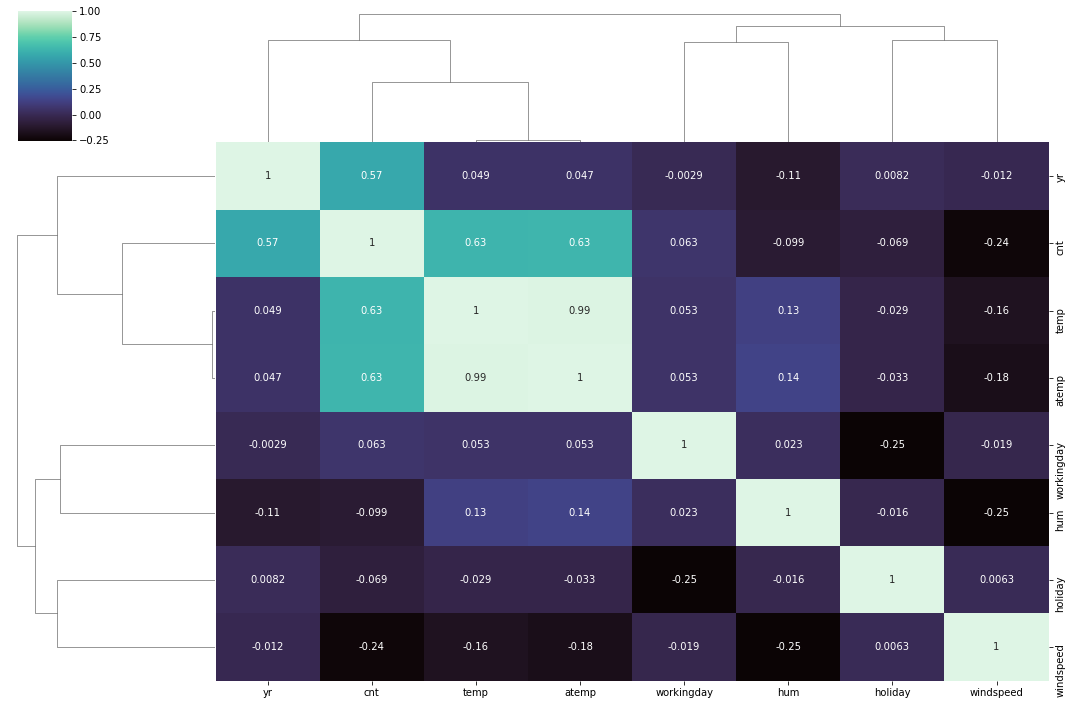

In [18]:
# Plot cluster map (dendrogram) of correlation of new dataframe
sns.clustermap(bss_df.corr(), annot = True, figsize = (15, 10), cmap="mako")
plt.show()

**Observations**

1) Strong correlation between 'temp' and 'atemp' - 0.99. Hence we can avoid one of the variable.

2) Temperature variables have some positive correlation with total count of Bike Rentals - 0.63.

3) Year variable 'yr' have next high correlation (0.57) with outcome variable 'cnt'.

#### Visualising Categorical Variables

Let's make a boxplot to view categorical variables.

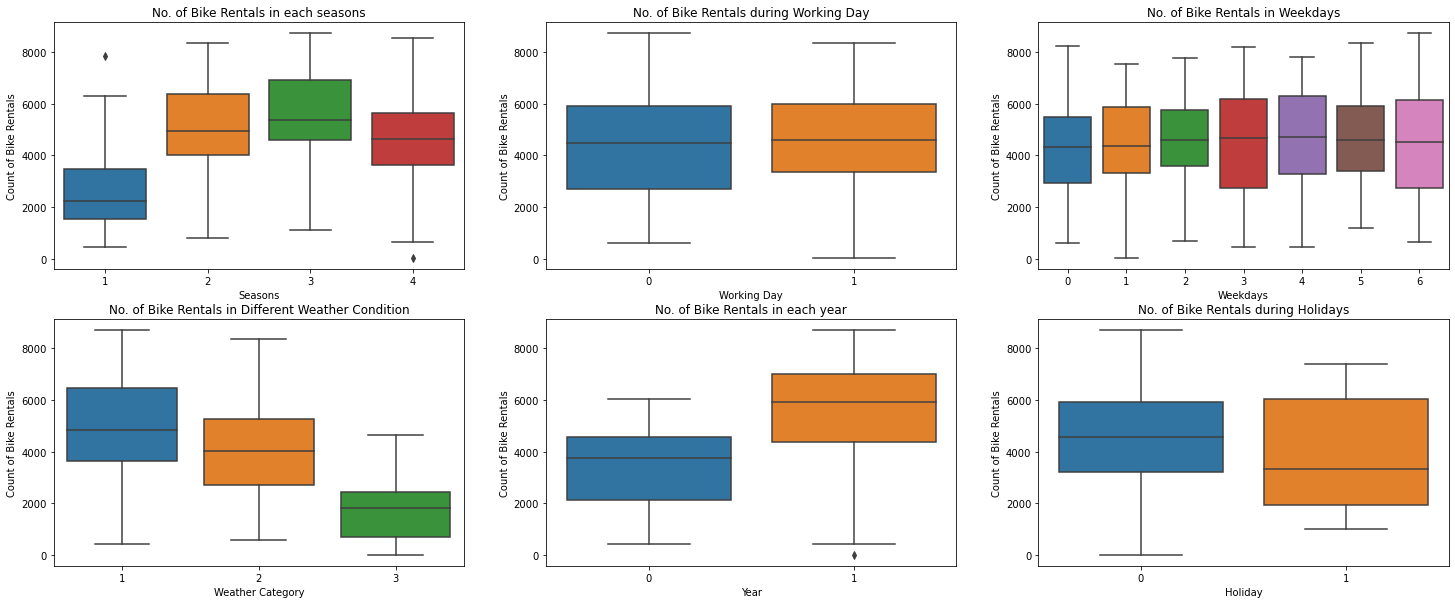

In [19]:
# Subplot - 2 rows and 3 columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (25, 10))

# Box Plot of column 'season'
sns.boxplot(x = 'season', y = 'cnt', data = bss_df, ax = axes[0][0])
axes[0][0].set_xlabel('Seasons', fontsize = 10)
axes[0][0].set_title('No. of Bike Rentals in each seasons', fontsize = 12)
axes[0][0].set_ylabel('Count of Bike Rentals', fontsize = 10)

# Box Plot of column 'workingday'
sns.boxplot(x = 'workingday', y = 'cnt', data = bss_df, ax = axes[0][1])
axes[0][1].set_xlabel('Working Day', fontsize = 10)
axes[0][1].set_title('No. of Bike Rentals during Working Day', fontsize = 12)
axes[0][1].set_ylabel('Count of Bike Rentals', fontsize = 10)

# Box Plot of column 'weekday'
sns.boxplot(x = 'weekday', y = 'cnt', data = bss_df, ax = axes[0][2])
axes[0][2].set_xlabel('Weekdays', fontsize = 10)
axes[0][2].set_title('No. of Bike Rentals in Weekdays', fontsize = 12)
axes[0][2].set_ylabel('Count of Bike Rentals', fontsize = 10)

# Box Plot of column 'weathersit'
sns.boxplot(x = 'weathersit', y = 'cnt', data = bss_df, ax = axes[1][0])
axes[1][0].set_xlabel('Weather Category', fontsize = 10)
axes[1][0].set_title('No. of Bike Rentals in Different Weather Condition', fontsize = 12)
axes[1][0].set_ylabel('Count of Bike Rentals', fontsize = 10)

# Box Plot of column 'yr'
sns.boxplot(x = 'yr', y = 'cnt', data = bss_df, ax = axes[1][1])
axes[1][1].set_xlabel('Year', fontsize = 10)
axes[1][1].set_title('No. of Bike Rentals in each year', fontsize = 12)
axes[1][1].set_ylabel('Count of Bike Rentals', fontsize = 10)

# Box Plot of column 'holiday'
sns.boxplot(x = 'holiday', y = 'cnt', data = bss_df, ax = axes[1][2])
axes[1][2].set_xlabel('Holiday', fontsize = 10)
axes[1][2].set_title('No. of Bike Rentals during Holidays', fontsize = 12)
axes[1][2].set_ylabel('Count of Bike Rentals', fontsize = 10)

plt.show()

**Observations**

1) From box plot - 'No. of Bike Rentals in each seasons', judging by median more bikes are rented during Fall (3 in graph) season.

2) From box plot - 'No. of Bike Rentals during Working Day', median is similar for workin and non-working days. Since spread is more for non-working days, there is less chance for bike rentals.

3) From box plot - 'No. of Bike Rentals in Weekdays', overall median looks similar across all days. Monday (6), Tuesday (0) and Wednesday (1) have more bike users.

4) From box plot - 'No. of Bike Rentals in Different Weather Condition', more bikes are rented during Clear, Few clouds, Partly cloudy, Partly cloudy weather (1 in x-axis).

5) From box plot - 'No. of Bike Rentals in each year', we can see that year 2019 have highest peak in rented bikes (higher median than 2018). Hence we can conclude that every year, number of bike rentals can go up.

6) From box plot - 'No. of Bike Rentals during Holidays', we can see the spread is more during holidays but the median is less when compared to non-holidays. This means that more bike rentals happen in non-holidays. This might be because, during holidays users prefer another mode for transportation.

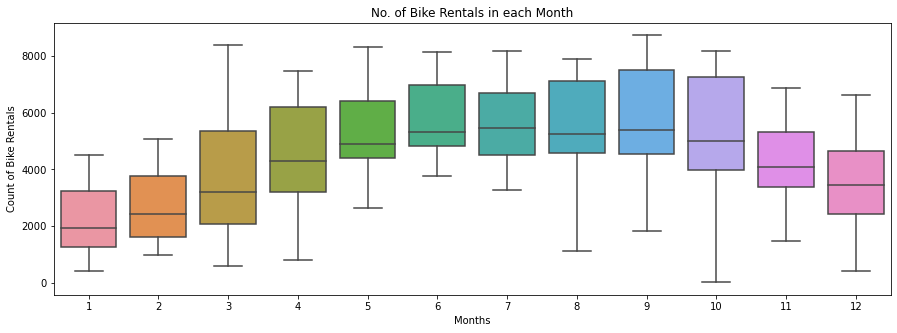

In [20]:
# Box Plot of column 'mnth'
plt.figure(figsize = (15, 5))
ax = sns.boxplot(x = 'mnth', y = 'cnt', data = bss_df)
ax.set_xlabel('Months', fontsize = 10)
ax.set_title('No. of Bike Rentals in each Month', fontsize = 12)
ax.set_ylabel('Count of Bike Rentals', fontsize = 10)
plt.show()

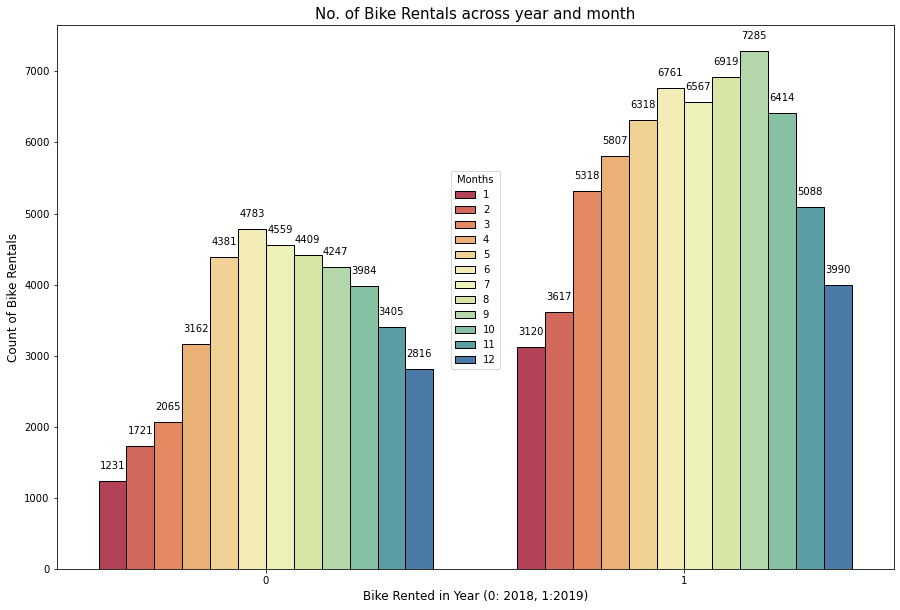

In [21]:
# Plot number of users rented bikes in years vs months to further categorize
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = 'yr', y = 'cnt', hue = 'mnth', data = bss_df, ci = None, palette = "Spectral", edgecolor = 'black', linewidth = 1)
ax.set_xlabel('Bike Rented in Year (0: 2018, 1:2019)', fontsize = 12)
ax.set_ylabel('Count of Bike Rentals', fontsize = 12)
ax.set_title('No. of Bike Rentals across year and month', fontsize = 15)
plt.legend(title = 'Months', loc = 10, bbox_to_anchor = (0.2, 0.5, 0.6, 0.1))
for container in ax.containers:
    ax.bar_label(container, fmt = '%d', padding = 10)
plt.show()

**Observations** : In 2019, more bikes were rented during September time. This clearly relates to why users rented bike more in 'Fall' season.

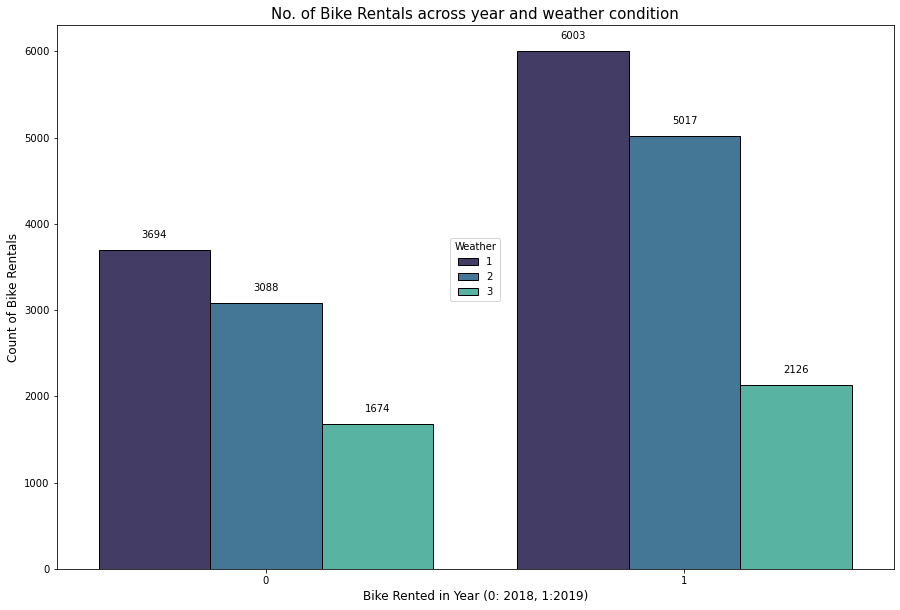

In [22]:
# Plot number of users rented bikes in years vs months to further categorize
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = 'yr', y = 'cnt', hue = 'weathersit', data = bss_df, ci = None, palette = "mako", edgecolor = 'black', linewidth = 1)
ax.set_xlabel('Bike Rented in Year (0: 2018, 1:2019)', fontsize = 12)
ax.set_ylabel('Count of Bike Rentals', fontsize = 12)
ax.set_title('No. of Bike Rentals across year and weather condition', fontsize = 15)
plt.legend(title = 'Weather', loc = 10, bbox_to_anchor = (0.2, 0.5, 0.6, 0.1))
for container in ax.containers:
    ax.bar_label(container, fmt = '%d', padding = 10)
plt.show()

**Observations** : Number of bike rentals increased from 2018 to 2019, especially when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy.

### Data Preparation

#### Create Dummy Variables

In order to fit a regression line, we would need numerical values and not string or categorical. Hence, we need to convert them to 1's and 0's representation.

In [23]:
# Get unique count of 'season', 'weekday' and 'weathersit'
list_of_columns = ['season', 'weekday', 'weathersit']

for col in list_of_columns:
    print(bss_df[col].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [24]:
# Get the dummy variables for the features 'season', 'mnth', 'weekday' and 'weathersit'.
# Store it in a new data frame - 'dummy_df'.
list_of_columns = ['season', 'mnth', 'weekday', 'weathersit']

dummy_df = pd.get_dummies(bss_df[list_of_columns], drop_first = True)

# Check how 'dummy_df' data frame looks like
dummy_df.head()

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
# Check size of dummy dataframe
dummy_df.shape

(730, 22)

Dummy dataframe have 730 rows and 22 columns

##### Dummy Variables Meaning

Let's create a table to understand what newly created dummy variables indicates.

###### Seasons

<table align="left">
  <tr>
    <th>season_2</th>
    <th>season_3</th>
    <th>season_4</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td><p style="color:blue">Spring</p></td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">Summer</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
	<td><p style="color:blue">Fall</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>1</td>
	<td><p style="color:blue">Winter</p></td>
  </tr>
</table>


###### Months

<table align="left">
  <tr>
    <th>mnth_2</th>
    <th>mnth_3</th>
    <th>mnth_4</th>
    <th>mnth_5</th>
    <th>mnth_6</th>
    <th>mnth_7</th>
    <th>mnth_8</th>
    <th>mnth_9</th>
    <th>mnth_10</th>
    <th>mnth_11</th>
    <th>mnth_12</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td><p style="color:blue">January</p></td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">February</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">March</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">April</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">May</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">June</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">July</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">August</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">September</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">October</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
	<td><p style="color:blue">November</p></td>
  </tr>
    <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
	<td><p style="color:blue">December</p></td>
  </tr>
</table>

###### Weekday

<table align="left">
  <tr>
    <th>weekday_1</th>
    <th>weekday_2</th>
    <th>weekday_3</th>
    <th>weekday_4</th>
    <th>weekday_5</th>
    <th>weekday_6</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td><p style="color:blue">Tuesday</p></td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">Wednesday</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">Thursday</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">Friday</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
	<td><p style="color:blue">Saturday</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
	<td><p style="color:blue">Sunday</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
	<td><p style="color:blue">Monday</p></td>
  </tr>
</table>

###### Weather

<table align="left">
  <tr>
    <th>weathersit_2</th>
    <th>weathersit_3</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td><p style="color:blue">Clear, Few clouds, Partly cloudy, Partly cloudy</p></td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
	<td><p style="color:blue">Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</p></td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
	<td><p style="color:blue">Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</p></td>
  </tr>
</table>

In [26]:
# Add the dummy dataframe  to the original bike sharing system dataframe
bss_df = pd.concat([bss_df, dummy_df], axis = 1)

# Now let's see the first 5 rows of bike sharing system dataframe.
bss_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
# Drop following columns as we have created the dummies for it
list_of_columns = ['season', 'mnth', 'weekday', 'weathersit']

# Remove columns
bss_df.drop(labels = list_of_columns, axis = 1, inplace = True)

# Now let's see the first 5 rows of bike sharing system dataframe.
bss_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.11,18.18,80.58,10.75,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.90,17.69,69.61,16.65,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
# Check the shape of the dataframe
bss_df.shape

(730, 30)

The dataframe have 730 rows and 30 columns.

Let's look at correlation matrix once more, since we added dummy variables

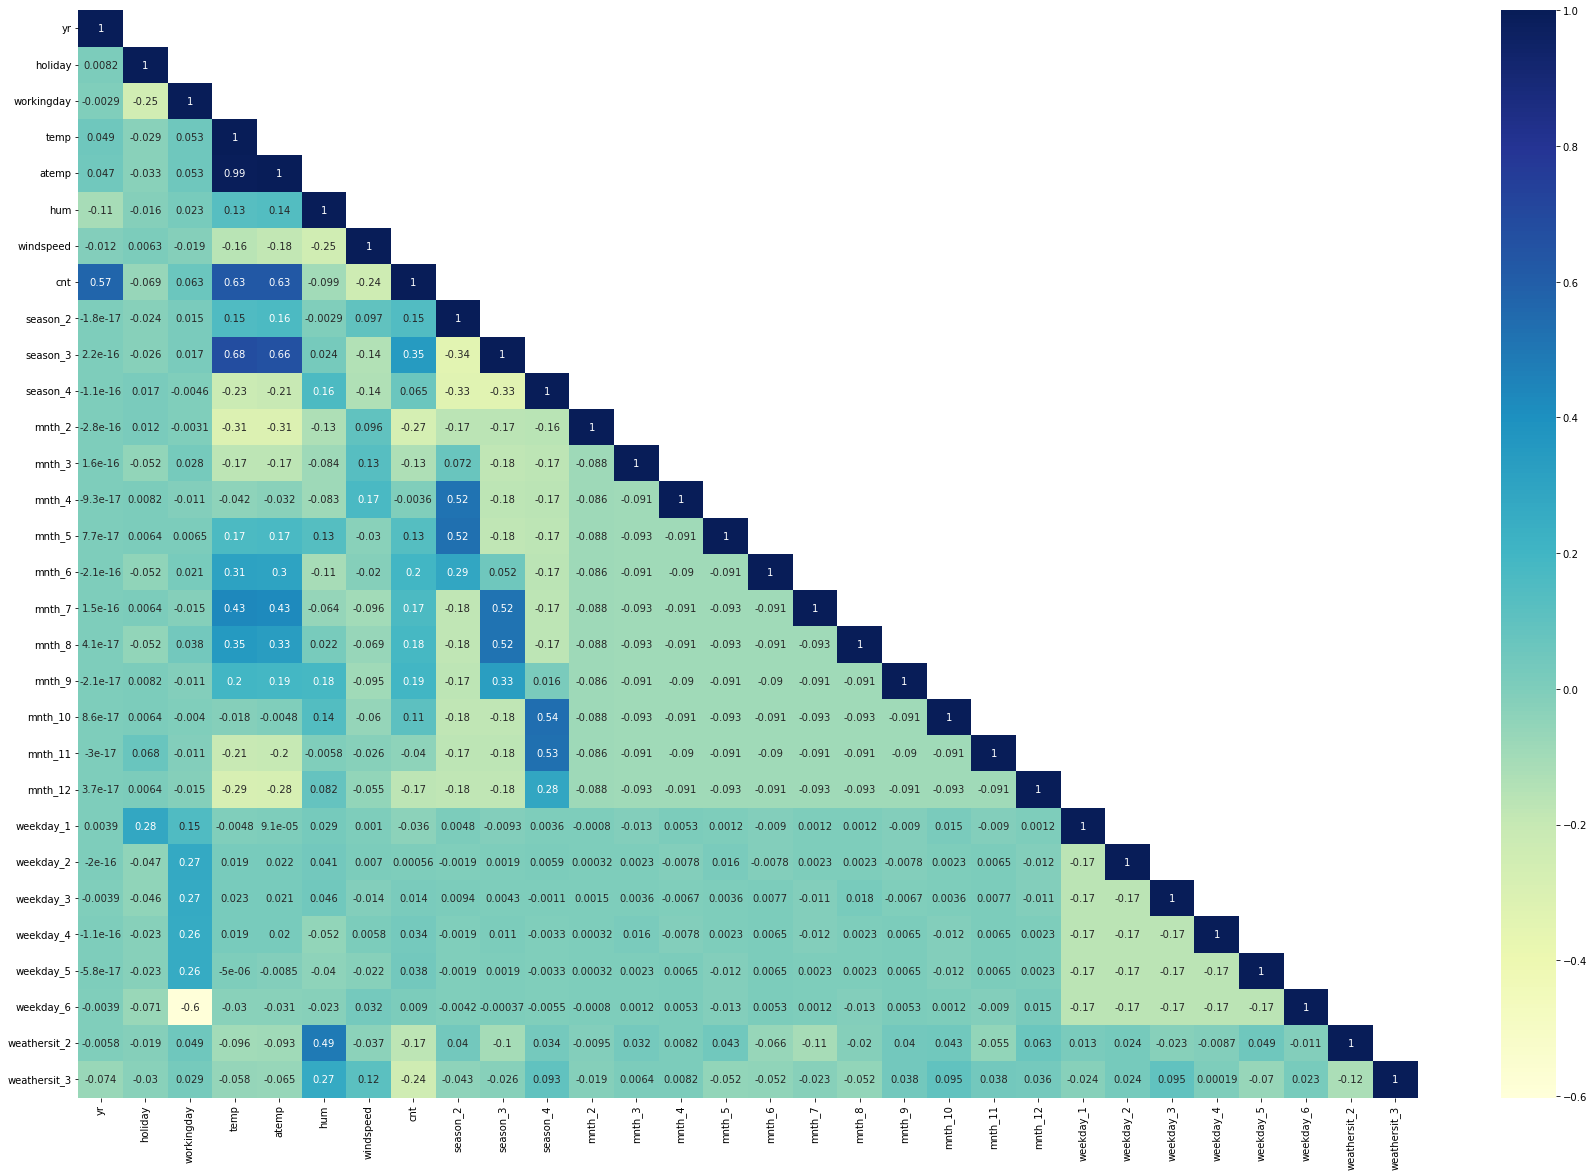

In [29]:
# Add a mask to hide upper diagonal elements for easiness in viewing correlation of 30 variables.
mask = np.array(bss_df.corr())
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (30, 20))
sns.heatmap(bss_df.corr(), mask = mask, annot = True, cmap="YlGnBu")
plt.show()

### Splitting the Data into Training and Testing Sets

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bss_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# Check the size of train and test dataframe
print("Train dataframe have {0} Rows and {1} Columns".format(df_train.shape[0], df_train.shape[1]))
print("Test dataframe have {0} Rows and {1} Columns".format(df_test.shape[0], df_test.shape[1]))

Train dataframe have 510 Rows and 30 Columns
Test dataframe have 219 Rows and 30 Columns


#### Rescaling the Features

Columns 'temp', 'hum', 'windspeed', and 'cnt' have large values, hence we need to rescale the variables so that they have a comparable scale with other variables. We will use MinMax scaling.

In [32]:
# Call API
scaler = MinMaxScaler()

# Apply scaler() to following variables
list_of_columns = ['temp', 'hum', 'windspeed', 'cnt' ]

# Use fit to learn scaler parameters (max, min) of train dataset and apply it to transform the dataset
df_train[list_of_columns] = scaler.fit_transform(df_train[list_of_columns])

In [33]:
# See first 5 rows of train dataframe
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.51,23.04,0.58,0.30,0.86,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.82,33.14,0.73,0.26,0.83,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.44,20.67,0.64,0.26,0.47,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.25,11.59,0.50,0.66,0.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.40,18.88,0.50,0.19,0.48,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [34]:
# Get statistics of train dataframe
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.0,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,23.49,0.65,0.32,0.51,0.25,0.26,0.25,0.07,0.1,0.08,0.08,0.07,0.08,0.10,0.08,0.09,0.09,0.08,0.15,0.13,0.16,0.13,0.13,0.15,0.34,0.03
std,0.50,0.16,0.47,0.23,8.09,0.15,0.17,0.22,0.43,0.44,0.43,0.25,0.3,0.27,0.28,0.26,0.27,0.29,0.27,0.28,0.28,0.28,0.36,0.34,0.37,0.34,0.33,0.36,0.48,0.17
min,0.00,0.00,0.00,0.00,3.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,16.60,0.54,0.20,0.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,24.02,0.65,0.30,0.52,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.74,30.18,0.75,0.41,0.68,0.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,42.04,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Now we have all variables in the range 0 to 1.

### Building our model

#### Dividing into X and Y sets for the model building

In [35]:
# Pop 'cnt' column to get our target variable and store the rest of the variables in another dataframe
y_train = df_train.pop('cnt')
X_train = df_train

#### Recursive Feature Elimination (RFE)

We will use RFE to automate the selection of 15 (~half of total variables) best variables from 30 variables that are goot fit for our model.

In [36]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
# Zip column names, RFE supported variables and its corresponding rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 14),
 ('weekday_1', False, 7),
 ('weekday_2', False, 8),
 ('weekday_3', False, 12),
 ('weekday_4', False, 13),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [38]:
# Get selected features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [39]:
# Get non-selected features
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

##### Model 1

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [42]:
# Running the linear model
lm_1 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          1.89e-191
Time:                        00:25:44   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [44]:
# Function to calculate the VIFs for each model
def generate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [45]:
# Calculate the VIFs for model 1
generate_vif(X_train_rfe)

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.44
8,season_4,2.88
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.90


**Observations**

* Standard acceptance value of **p-value** is any value less than 0.05.
* Standard acceptance value of Variance Inflation Factor (**VIF**) is any value less than 5.
 
p-value of variable 'season_3' is higher than all other variables and looks insignificant (p-value : 0.179 > 0.05 and VIF : 8.19 > 5), let's drop 'season_3' variable.

In [46]:
X_train_rfe.drop(labels = 'season_3', axis = 1, inplace = True)

##### Model 2

Rebuilding the model without 'season_3' variable

In [47]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [48]:
# Running the linear model
lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          3.24e-192
Time:                        00:25:44   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [50]:
# Calculate the VIFs for model 2
generate_vif(X_train_rfe)

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


**Observations**

* Adjusted R-squared remains same.
* Reduction of p-value and VIF for some variables.

Variable 'hum' have VIF value of 16.59 eventhough p-value is acceptable.
From heatmap of correlation matrix, we can see 'hum' have correlation of 0.49 with variable 'weathersit_2'.
This can indicate multicolinearity. So, let's drop 'hum' variable.

In [51]:
X_train_rfe.drop(labels = 'hum', axis = 1, inplace = True)

##### Model 3

Rebuilding the model without 'hum' variable

In [52]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [53]:
# Running the linear model
lm_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          6.16e-189
Time:                        00:25:44   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961   

In [55]:
# Calculate the VIFs for model 3
generate_vif(X_train_rfe)

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


**Observations**

* p-value of 'holiday' variable increased.
* Reduction of p-value and VIF for some variables.

Variable 'holiday' have p-value value of 0.048 (~0.05) eventhough VIF is acceptable. Also variable 'holiday' is related to 'workingday'. Let's drop variable 'holiday' temporarily and see how it affects p-value and VIF of all variables.

In [56]:
X_train_new = X_train_rfe.drop(labels = 'holiday', axis = 1)

##### Model 4

Rebuilding the model without 'holiday' variable

In [57]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [58]:
# Running the linear model
lm_4 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.86e-189
Time:                        00:25:45   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610   

In [60]:
# Calculate the VIFs for model 4
generate_vif(X_train_new)

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_4,1.99
4,season_2,1.82
9,weekday_6,1.70
8,mnth_10,1.61
6,mnth_8,1.59
10,weathersit_2,1.54


**Observations**

* p-value of 'mnth_10' variable decreased.
* Reduction of p-value and VIF for some variables.

Variable 'mnth_10' have p-value value of 0.028 eventhough VIF is acceptable.
From heatmap of correlation matrix, we can see 'mnth_10' have correlation of 0.54 with variable 'season_4'. This can indicate relation exists between two variables. Also when comparing other months (bar plot), variable 'mnth_10' is less significant.
Let's drop variable 'mnth_10' temporarily and see how it affects p-value and VIF of all variables.

In [61]:
X_train_new.drop(labels = 'mnth_10', axis = 1, inplace = True)

##### Model 5

Rebuilding the model without 'mnth_10' variable

In [62]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [63]:
# Running the linear model
lm_5 = sm.OLS(y_train, X_train_lm).fit()

In [64]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.00e-189
Time:                        00:25:45   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0813      0.019      4.384   

In [65]:
# Calculate the VIFs for model 5
generate_vif(X_train_new)

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_2,1.81
8,weekday_6,1.69
6,mnth_8,1.58
9,weathersit_2,1.54
5,season_4,1.51
7,mnth_9,1.30


**Observations**

* p-value of 'mnth_8' variable slightly increased.
* Reduction of p-value and VIF for some variables.

Judging by heatmap of correlation of variables and p-value value of 0.002, let's drop variable 'mnth_8' temporarily and see how it affects p-value and VIF of all variables.

In [66]:
X_train_new.drop(labels = 'mnth_8', axis = 1, inplace = True)

##### Model 6

Rebuilding the model without 'mnth_8' variable

In [67]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [68]:
# Running the linear model
lm_6 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          1.47e-188
Time:                        00:25:45   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051   

In [70]:
# Calculate the VIFs for model 6
generate_vif(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


In [71]:
# Coefficients of variables used in Model 6
lm_6.params

const           0.08
yr              0.23
workingday      0.06
temp            0.55
windspeed      -0.16
season_2        0.09
season_4        0.13
mnth_9          0.10
weekday_6       0.07
weathersit_2   -0.08
weathersit_3   -0.29
dtype: float64

#### Model Analysis

**Model 6** can give promising result that we seek for since all p-values are very less and VIF values are less than 5.

Also all coefficients of variables are not zero, hence we can reject NULL Hypothesis.

* F-statistic:                     254.0
* Prob (F-statistic):          1.47e-188

F-statistics looks good (greater than 1) and Prob (F-statistic) is almost zero, which indicates model is significant.

* R-squared:                       0.836
* Adj. R-squared:                  0.832

R-squared and Adjusted R-squared also looks promising.

Let's check the relationship between predictor variables is linear or not using ccpr plot

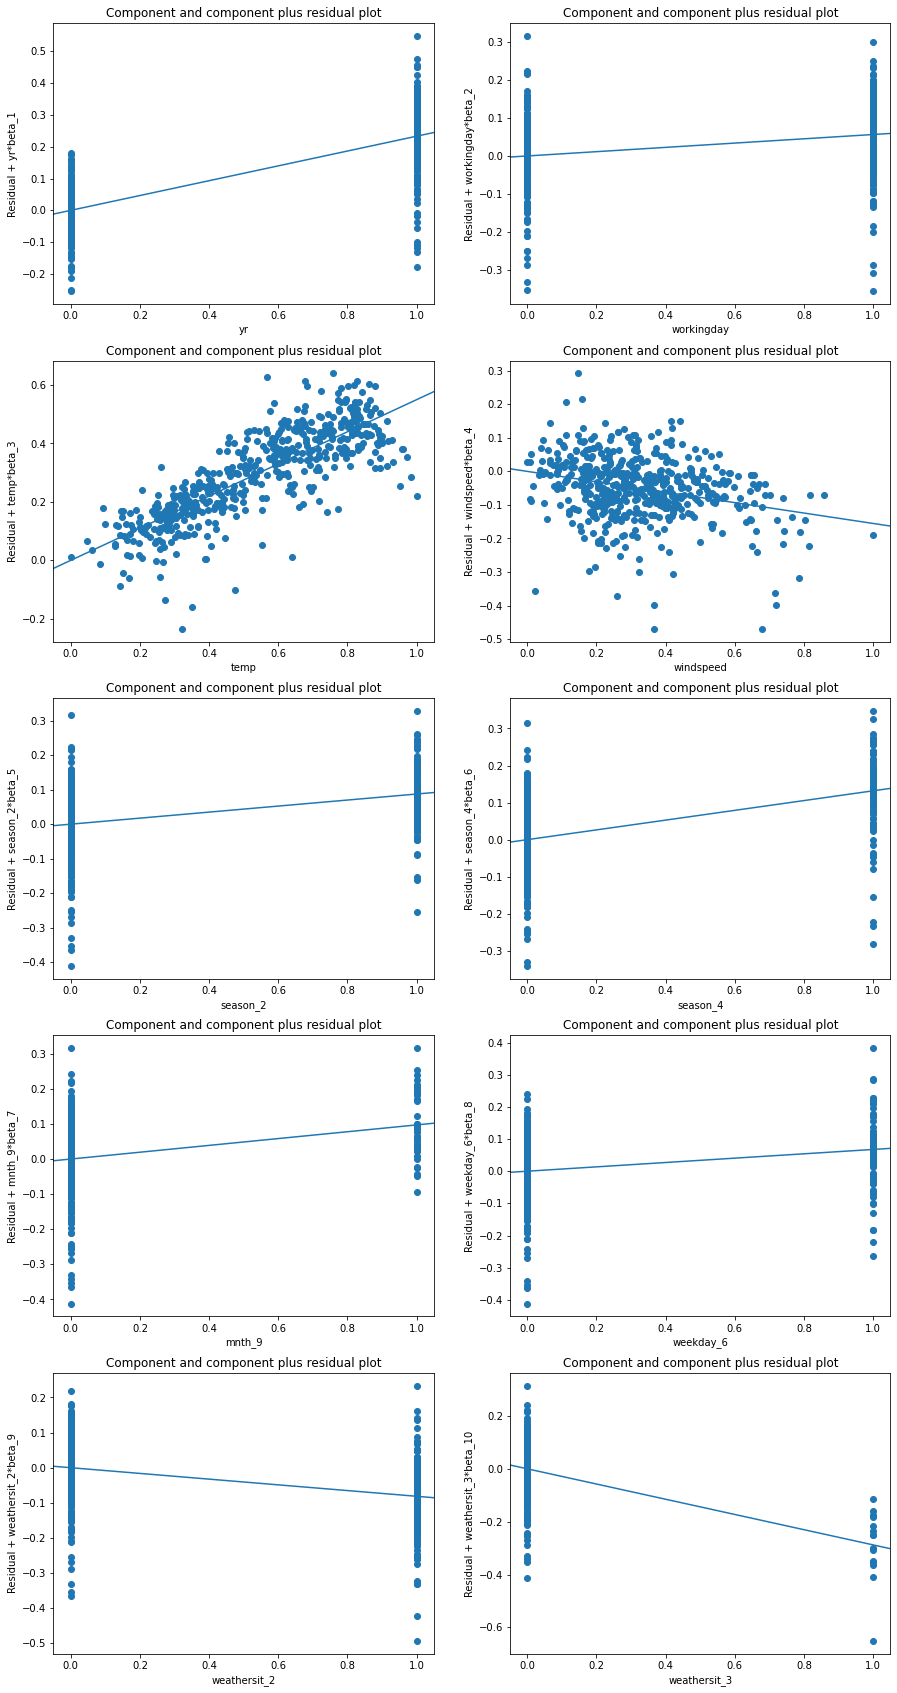

In [72]:
# Component and Component-Plus-Residual (CCPR) plot
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 30))
for i, ax in enumerate(axes.flat):
    sm.graphics.plot_ccpr(lm_6, X_train_new.columns[i], ax = ax)
plt.show()

Linear relationship is validated.

Let's go ahead with this model for further residual analysis.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
# Predict train target variable value using model 6
y_train_pred = lm_6.predict(X_train_lm)

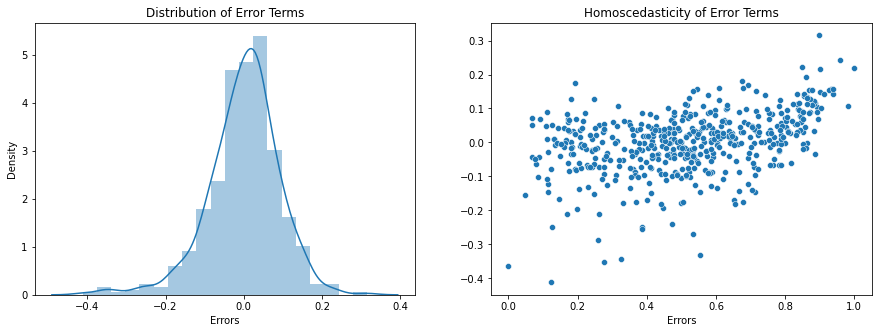

In [74]:
# Subplot - 1 rows and 2 columns
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# Plot the distribution plot of the error terms
sns.distplot((y_train - y_train_pred), bins = 20, ax = axes[0])
axes[0].set_title('Distribution of Error Terms', fontsize = 12)
axes[0].set_xlabel('Errors', fontsize = 10)

# Scatter plot of residuals to see Homoscedasticity
sns.scatterplot(y_train, (y_train - y_train_pred), ax = axes[1])
axes[1].set_title('Homoscedasticity of Error Terms', fontsize = 12)
axes[1].set_xlabel('Errors', fontsize = 10)
plt.show()

From the above distribution plot, we could see that the Residuals are normally distributed. Also from the scatter plot of residuals, there is no visible pattern. Hence our assumption for Linear Regression is valid.

### Making Predictions

#### Applying the scaling on the test sets

In [75]:
# Apply scaler() to following variables
list_of_columns = ['temp', 'hum', 'windspeed', 'cnt' ]

# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
df_test[list_of_columns] = scaler.transform(df_test[list_of_columns])

# See first 5 rows of test dataframe
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.83,33.27,0.66,0.08,0.69,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.90,36.05,0.61,0.15,0.71,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.51,22.85,0.84,0.33,0.30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.88,34.25,0.44,0.34,0.55,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.82,32.20,0.31,0.54,0.57,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [76]:
# Get statistics of test dataframe
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.0,219.00,219.00,219.00,219.0,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.0,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,0.56,24.26,0.64,0.31,0.52,0.26,0.25,0.23,0.1,0.05,0.09,0.09,0.1,0.11,0.06,0.09,0.08,0.07,0.09,0.13,0.16,0.1,0.16,0.18,0.12,0.32,0.03
std,0.50,0.19,0.46,0.23,8.30,0.15,0.16,0.22,0.44,0.43,0.42,0.3,0.23,0.29,0.28,0.3,0.31,0.24,0.28,0.28,0.26,0.28,0.33,0.37,0.3,0.37,0.38,0.32,0.47,0.16
min,0.00,0.00,0.00,0.05,4.94,0.26,-0.04,0.05,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.35,17.09,0.53,0.20,0.38,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.56,24.87,0.63,0.30,0.52,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.76,31.16,0.74,0.40,0.67,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,0.98,41.32,1.00,0.81,0.96,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


**Observation**

We can see that the min and max of variables are not between 0 and 1.

#### Dividing into X_test and y_test

In [77]:
# Pop 'cnt' column to get our target variable and store the rest of the variables in another dataframe
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test)

# See first 5 rows of test linear model dataframe
X_test_lm.head()

,const,yr,workingday,temp,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
184,1.0,0,0,0.83,0.08,0,0,0,0,1,0
535,1.0,1,1,0.90,0.15,1,0,0,0,0,0
299,1.0,0,1,0.51,0.33,0,1,0,0,1,0
221,1.0,0,1,0.88,0.34,0,0,0,0,0,0
152,1.0,0,1,0.82,0.54,1,0,0,0,0,0


In [79]:
# Making predictions using model 6
y_pred = lm_6.predict(X_test_lm)

### Model Evaluation

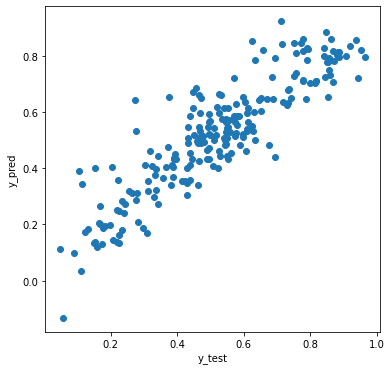

In [80]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 12)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)
plt.show()

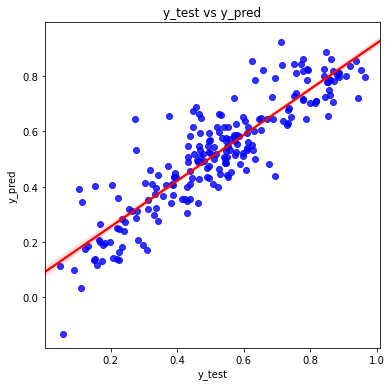

In [81]:
# Regression plot with confidence level 68%
plt.figure(figsize = (6, 6))
sns.regplot(x = y_test, y = y_pred, truncate = False, ci = 68, fit_reg = True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize = 12)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)
plt.show()

We can see that the equation of our best fitted line is:

cnt = 0.08 + temp x **0.55** + yr x **0.23** + season_4 x **0.13** + mnth_9 x **0.1** + season_2 x **0.09** + weekday_6 x **0.07** + workingday x **0.06** - weathersit_2 x **0.08** - windspeed x **0.16** - weathersit_3 x **0.29**

And y_test vs y_pred scatter plot looks good.

### R-squared for Test Data

In [82]:
# Calculate R-squared of test data vs predicted
r2 = r2_score(y_true = y_test, y_pred = y_pred)
r2

0.7955844377237248

### Adjusted R-squared for Test Data

In [83]:
# Calculating Adjusted R-squared value for the test dataset
# n is the sample size of test dataframe
n = X_test.shape[0]

# p is the number of predictor variables of test dataframe
p = X_test.shape[1]

# Calculate Adjusted R-squared using the formula
adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
adjusted_r2

0.7857567664604423

### Recommendations

#### Linear Regression Model Summary Statistics of Train and Test Data
* Train data R^2 : **0.836**
* Train data Adjusted R^2 : **0.832**
* Test data R^2 : **0.795**
* Test data Adjusted R^2 : **0.785**

This seems to be a really decent model that can differentiate the dataset and can predict the variable 'cnt'.

#### Top predictor variables
* **Temperature (temp)** : coefficient value of 0.55. As temperature variable increases bike rentals increases by 0.55 units, provided all other predictor variables are constant.
* **Year (yr)** : coefficient value of 0.23. Bike rentals can increase by 0.23 units / year, provided all other predictor variables are constant.
* **Weather Situation 3 (weathersit_3)** : coefficient value of -0.29. When weather is either Light Snow or Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds, bike rentals can decrease by 0.29 units, provided all other predictor variables are constant.